In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pprint
import pandas as pd
%pylab inline
from collections import defaultdict

Populating the interactive namespace from numpy and matplotlib


# The following section uses no evidence in inference for the initial starting products

# Plot Confidence intervals for product LTVs

In [4]:
clients_over_time_per_week_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_all_clients")
cumulative_clients_over_time_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/times_series_cumulative_clients")
#cash management
cumulative_cm_customers_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_cash_management")
rev_customer_cm_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_cash_management_rev_per_customer")
total_weekly_rev_cm_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_cash_management_total_weekly_rev")
# checking
cumulative_checking_customers_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_checking")
rev_customer_checking_no_evidence  = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_checking_rev_per_customer")
total_weekly_rev_checking_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_checking_total_weekly_rev")
#CMMA
cumulative_cmma_customers_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_collateral_mma ")
rev_customer_cmma_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_collateral_mma_rev_per_customer")
total_weekly_rev_cmma_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_collateral_mma_total_weekly_rev")
# Enterprise Sweep
cumulative_es_customers_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_enterprise_sweep")
rev_customer_es_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_enterprise_sweep_rev_per_customer")
total_weekly_rev_es_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_enterprise_sweep_total_weekly_rev")
# FX
cumulative_fx_customers_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_fx")
rev_customer_fx_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_fx_rev_per_customer")
total_weekly_rev_fx_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_fx_total_weekly_rev")
# letters of credit
cumulative_loc_customers_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_letters_of_credit ")
rev_customer_loc_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_letters_of_credit_rev_per_customer")
total_weekly_rev_loc_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_letters_of_credit_total_weekly_rev")
#Money Market Bonus
cumulative_mmb_customers_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_money_market_bonus")
rev_customer_mmb_no_evidence = pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_money_market_bonus_rev_per_customer")
total_weekly_rev_mmb_no_evidence =  pd.read_pickle("../data-104-weeks-no-evidence/time_series_esp_money_market_bonus_total_weekly_rev")



# Plot the total number of clients over time

In [268]:
cumulative_clients_week_0_no_evidence = defaultdict(list)
cumulative_clients_week_1_no_evidence = defaultdict(list)
cumulative_clients_week_2_no_evidence = defaultdict(list)
cumulative_clients_week_0_final = []
cumulative_clients_week_1_final = []
cumulative_clients_week_2_final = []
[cumulative_clients_week_0_no_evidence[i[1]].append(i[2]) for i in cumulative_clients_over_time_no_evidence[0]]
[cumulative_clients_week_1_no_evidence[i[1]].append(i[2]) for i in cumulative_clients_over_time_no_evidence[1]]
[cumulative_clients_week_2_no_evidence[i[1]].append(i[2]) for i in cumulative_clients_over_time_no_evidence[2]]
for k,v in cumulative_clients_week_0_no_evidence.items():
    cumulative_clients_week_0_final.append(max(v))
for k,v in cumulative_clients_week_1_no_evidence.items():
    cumulative_clients_week_1_final.append(max(v))  
for k,v in cumulative_clients_week_2_no_evidence.items():
    cumulative_clients_week_2_final.append(max(v)) 
final_cumulative_clients_no_evidence = [cumulative_clients_week_0_final
                                        ,cumulative_clients_week_1_final,cumulative_clients_week_2_final]

In [269]:
final_cumulative_clients_no_evidence = [cumulative_clients_week_0_final
                                        ,cumulative_clients_week_1_final,cumulative_clients_week_2_final]

In [276]:
final_cumulative_clients_no_evidence[2][-1]

1068

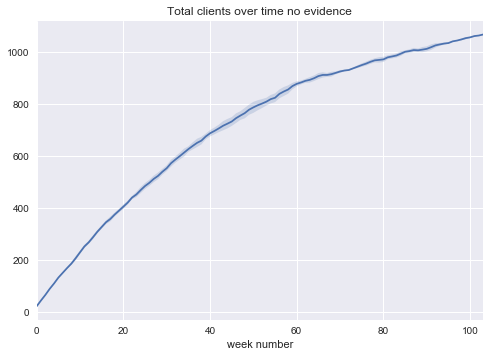

In [271]:
sns.tsplot(final_cumulative_clients_no_evidence)
plt.title('Total clients over time no evidence')
plt.xlabel('week number')

# Plot the confidence intervals of the percent of people per product over time 
## No evidence about products given

In [186]:
# Get the percent across the three simulations to create a 85% confidence interval
cumulative_cm_customers_percent_no_evidence_final = []
cumulative_checking_customers_percent_no_evidence_final = []
cumulative_cmma_customers_percent_no_evidence_final = []
cumulative_es_customers_percent_no_evidence_final = []
cumulative_fx_customers_percent_no_evidence_final = []
cumulative_loc_customers_percent_no_evidence_final = []
cumulative_mmb_customers_percent_no_evidence_final = []

In [187]:
for simulation_cm,simulation_total in zip(cumulative_cm_customers_no_evidence,final_cumulative_clients_no_evidence) :
    cumulative_cm_customers_percent_no_evidence_final.append([i[2]/z for i,z in zip(simulation_cm,simulation_total)])

In [188]:
for simulation_checking,simulation_total in zip(cumulative_checking_customers_no_evidence,
                                                final_cumulative_clients_no_evidence) :
    cumulative_checking_customers_percent_no_evidence_final.append(
        [i[2]/z for i,z in zip(simulation_checking,simulation_total)])

In [189]:
for simulation_cmma,simulation_total in zip(cumulative_cmma_customers_no_evidence,
                                                final_cumulative_clients_no_evidence) :
    cumulative_cmma_customers_percent_no_evidence_final.append(
        [i[2]/z for i,z in zip(simulation_cmma,simulation_total)])

In [190]:
for simulation_es,simulation_total in zip(cumulative_es_customers_no_evidence,
                                                final_cumulative_clients_no_evidence) :
    cumulative_es_customers_percent_no_evidence_final.append(
        [i[2]/z for i,z in zip(simulation_es,simulation_total)])

In [191]:
for simulation_fx,simulation_total in zip(cumulative_fx_customers_no_evidence,
                                                final_cumulative_clients_no_evidence) :
    cumulative_fx_customers_percent_no_evidence_final.append(
        [i[2]/z for i,z in zip(simulation_fx,simulation_total)])

In [192]:
for simulation_loc,simulation_total in zip(cumulative_loc_customers_no_evidence,
                                                final_cumulative_clients_no_evidence) :
    cumulative_loc_customers_percent_no_evidence_final.append(
        [i[2]/z for i,z in zip(simulation_loc,simulation_total)])

In [193]:
for simulation_mmb,simulation_total in zip(cumulative_mmb_customers_no_evidence,
                                                final_cumulative_clients_no_evidence) :
    cumulative_mmb_customers_percent_no_evidence_final.append(
        [i[2]/z for i,z in zip(simulation_mmb,simulation_total)])

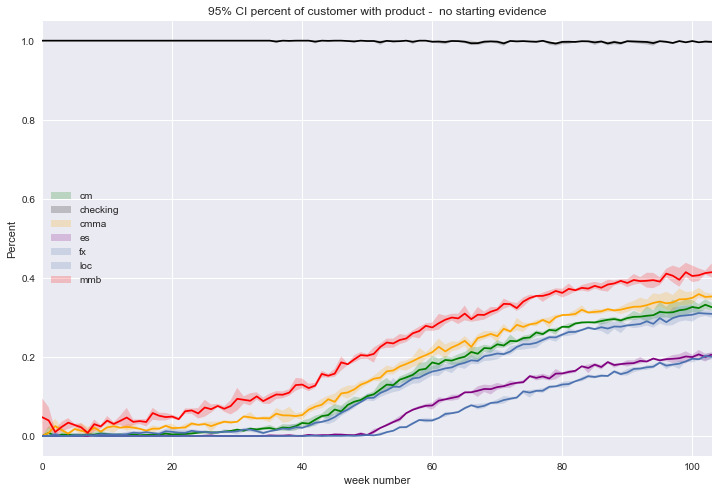

In [219]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,8))
#cm
sns.tsplot(data = cumulative_cm_customers_percent_no_evidence_final,value = 'cm',color='green', ci=95)
#checking
sns.tsplot(data =cumulative_checking_customers_percent_no_evidence_final, value = 'checking',color='black',ci=95)
#cmma
sns.tsplot(data =cumulative_cmma_customers_percent_no_evidence_final,value='cmma',color='orange',ci=95)
#es
sns.tsplot(data =cumulative_es_customers_percent_no_evidence_final,value='es',color='purple',ci=95)
#fx
sns.tsplot(data =cumulative_fx_customers_percent_no_evidence_final,value='fx',ci=95)
#loc
sns.tsplot(data =cumulative_loc_customers_percent_no_evidence_final,value='loc',ci=95)
#mmb
sns.tsplot(data =cumulative_mmb_customers_percent_no_evidence_final,value='mmb',ci=95, color ='red')

checking.legend(['checking'])
plt.legend(['cm','checking','cmma','es','fx','loc','mmb'])
plt.ylabel('Percent')
plt.xlabel('week number')
plt.title('95% CI percent of customer with product -  no starting evidence')

# Plot Revenue per product per client (time adjusted) over time
## No starting evidence

In [209]:
cumulative_cm_rev_per_customer_no_evidence_final = []
cumulative_checking_rev_per_customer_no_evidence_final = []
cumulative_cmma_rev_per_customer_no_evidence_final = []
cumulative_es_rev_per_customer_no_evidence_final = []
cumulative_fx_rev_per_customer_no_evidence_final = []
cumulative_loc_rev_per_customer_no_evidence_final = []
cumulative_mmb_rev_per_customer_no_evidence_final = []

In [210]:
for simulation in rev_customer_cm_no_evidence:
    cumulative_cm_rev_per_customer_no_evidence_final.append([i[2] for i in simulation])

In [211]:
for simulation in rev_customer_checking_no_evidence:
    cumulative_checking_rev_per_customer_no_evidence_final.append([i[2] for i in simulation])

In [212]:
for simulation in rev_customer_cmma_no_evidence:
    cumulative_cmma_rev_per_customer_no_evidence_final.append([i[2] for i in simulation])

In [213]:
for simulation in rev_customer_es_no_evidence:
    cumulative_es_rev_per_customer_no_evidence_final.append([i[2] for i in simulation])

In [214]:
for simulation in rev_customer_fx_no_evidence:
    cumulative_fx_rev_per_customer_no_evidence_final.append([i[2] for i in simulation])

In [215]:
for simulation in rev_customer_loc_no_evidence:
    cumulative_loc_rev_per_customer_no_evidence_final.append([i[2] for i in simulation])

In [216]:
for simulation in rev_customer_mmb_no_evidence:
    cumulative_mmb_rev_per_customer_no_evidence_final.append([i[2] for i in simulation])

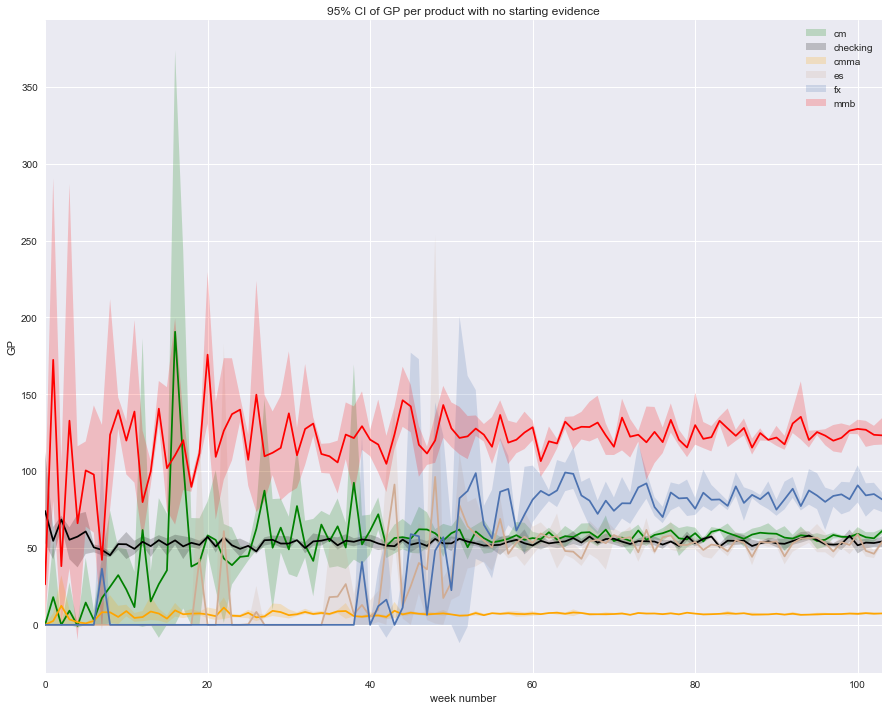

In [246]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,12))
#cm
sns.tsplot(data = cumulative_cm_rev_per_customer_no_evidence_final,value = 'cm',color='green', ci=95)
#checking
sns.tsplot(data =cumulative_checking_rev_per_customer_no_evidence_final, value = 'checking',color='black',ci=95)
#cmma
sns.tsplot(data =cumulative_cmma_rev_per_customer_no_evidence_final,value='cmma',color='orange',ci=95)
#es
sns.tsplot(data =cumulative_es_rev_per_customer_no_evidence_final,value='es',color='pink',ci=95)
#fx
sns.tsplot(data =cumulative_fx_rev_per_customer_no_evidence_final,value='fx',ci=95)
#loc
#sns.tsplot(data =cumulative_loc_rev_per_customer_no_evidence_final,value='loc',ci=95)
#mmb
sns.tsplot(data =cumulative_mmb_rev_per_customer_no_evidence_final,value='mmb',ci=95, color ='red')


plt.legend(['cm','checking','cmma','es','fx','mmb'])
plt.ylabel('GP')
plt.xlabel('week number')
plt.title('95% CI of GP per product with no starting evidence')

In [326]:
print('Mean CM GP for last period = {}'.format(mean([cumulative_cm_rev_per_customer_no_evidence_final[0][-1],
        cumulative_cm_rev_per_customer_no_evidence_final[1][-1],
        cumulative_cm_rev_per_customer_no_evidence_final[2][-1]])))

Mean CM for last period = 61.04760367698983


In [327]:
print('Mean Checking GP for last period = {}'.format(mean([cumulative_checking_rev_per_customer_no_evidence_final[0][-1],
        cumulative_checking_rev_per_customer_no_evidence_final[1][-1],
        cumulative_checking_rev_per_customer_no_evidence_final[2][-1]])))

Mean Checking for last period = 54.24292780560362


In [328]:
print('Mean cmma GP for last period = {}'.format(mean([cumulative_cmma_rev_per_customer_no_evidence_final[0][-1],
        cumulative_cmma_rev_per_customer_no_evidence_final[1][-1],
        cumulative_cmma_rev_per_customer_no_evidence_final[2][-1]])))

Mean cmma GP for last period = 7.4211817836389935


In [329]:
print('Mean es GP for last period = {}'.format(mean([cumulative_es_rev_per_customer_no_evidence_final[0][-1],
        cumulative_es_rev_per_customer_no_evidence_final[1][-1],
        cumulative_es_rev_per_customer_no_evidence_final[2][-1]])))

Mean es GP for last period = 53.97176665760401


In [330]:
print('Mean fx GP for last period = {}'.format(mean([cumulative_fx_rev_per_customer_no_evidence_final[0][-1],
        cumulative_fx_rev_per_customer_no_evidence_final[1][-1],
        cumulative_fx_rev_per_customer_no_evidence_final[2][-1]])))

Mean fx GP for last period = 81.63709381873565


In [331]:
print('Mean loc GP for last period = {}'.format(mean([cumulative_loc_rev_per_customer_no_evidence_final[0][-1],
        cumulative_loc_rev_per_customer_no_evidence_final[1][-1],
        cumulative_loc_rev_per_customer_no_evidence_final[2][-1]])))

Mean loc GP for last period = 6913.272899249615


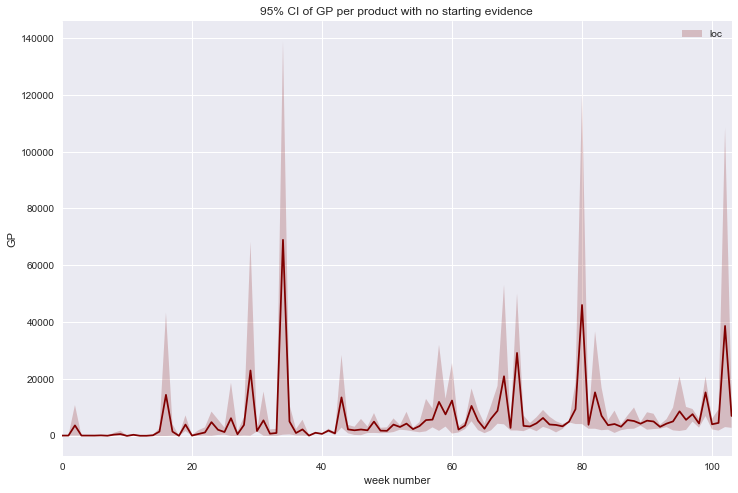

In [240]:
plt.figure(figsize=(12,8))
sns.tsplot(data =cumulative_loc_rev_per_customer_no_evidence_final,value='loc',ci=95,color='maroon')
plt.legend(['loc'])
plt.ylabel('GP')
plt.xlabel('week number')
plt.title('95% CI of GP per product with no starting evidence')

# Next, look at the results from each client starting with checking and cm product

In [295]:
clients_over_time_per_week_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_all_clients")
cumulative_clients_over_time_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/times_series_cumulative_clients")
#cash management
cumulative_cm_customers_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_cash_management")
rev_customer_cm_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_cash_management_rev_per_customer")
total_weekly_rev_cm_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_cash_management_total_weekly_rev")
# checking
cumulative_checking_customers_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_checking")
rev_customer_checking_evidence_checking_cm  = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_checking_rev_per_customer")
total_weekly_rev_checking_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_checking_total_weekly_rev")
#CMMA
cumulative_cmma_customers_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_collateral_mma ")
rev_customer_cmma_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_collateral_mma_rev_per_customer")
total_weekly_rev_cmma_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_collateral_mma_total_weekly_rev")
# Enterprise Sweep
cumulative_es_customers_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_enterprise_sweep")
rev_customer_es_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_enterprise_sweep_rev_per_customer")
total_weekly_rev_es_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_enterprise_sweep_total_weekly_rev")
# FX
cumulative_fx_customers_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_fx")
rev_customer_fx_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_fx_rev_per_customer")
total_weekly_rev_fx_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_fx_total_weekly_rev")
# letters of credit
cumulative_loc_customers_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_letters_of_credit ")
rev_customer_loc_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_letters_of_credit_rev_per_customer")
total_weekly_rev_loc_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_letters_of_credit_total_weekly_rev")
#Money Market Bonus
cumulative_mmb_customers_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_money_market_bonus")
rev_customer_mmb_evidence_checking_cm = pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_money_market_bonus_rev_per_customer")
total_weekly_rev_mmb_evidence_checking_cm =  pd.read_pickle("../data-104-weeks-checking-cm/time_series_esp_money_market_bonus_total_weekly_rev")



In [296]:
 # get cumulative customers
cumulative_clients_week_0_evidence_checking_cm = defaultdict(list)
cumulative_clients_week_1_evidence_checking_cm = defaultdict(list)
cumulative_clients_week_2_evidence_checking_cm = defaultdict(list)
cumulative_clients_week_0_final_evid_checking_cm = []
cumulative_clients_week_1_final_evid_checking_cm = []
cumulative_clients_week_2_final_evid_checking_cm = []
[cumulative_clients_week_0_evidence_checking_cm[i[1]].append(i[2]) for i in cumulative_clients_over_time_evidence_checking_cm[0]]
[cumulative_clients_week_1_evidence_checking_cm[i[1]].append(i[2]) for i in cumulative_clients_over_time_evidence_checking_cm[1]]
[cumulative_clients_week_2_evidence_checking_cm[i[1]].append(i[2]) for i in cumulative_clients_over_time_evidence_checking_cm[2]]
for k,v in cumulative_clients_week_0_evidence_checking_cm.items():
    cumulative_clients_week_0_final_evid_checking_cm.append(max(v))
for k,v in cumulative_clients_week_1_evidence_checking_cm.items():
    cumulative_clients_week_1_final_evid_checking_cm.append(max(v))  
for k,v in cumulative_clients_week_2_evidence_checking_cm.items():
    cumulative_clients_week_2_final_evid_checking_cm.append(max(v)) 
final_cumulative_clients_evidence_checking_cm = [cumulative_clients_week_0_final_evid_checking_cm
                                        ,cumulative_clients_week_1_final_evid_checking_cm,
                                        cumulative_clients_week_2_final_evid_checking_cm]

In [297]:
final_cumulative_clients_evidence_checking_cm[2][-1]

1051

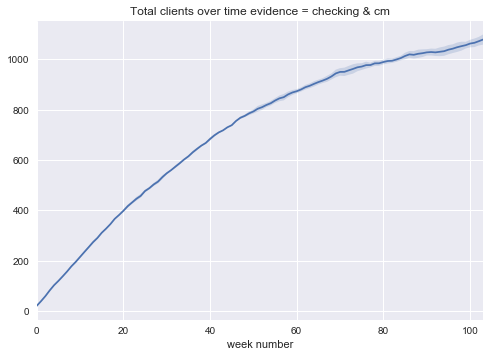

In [298]:
sns.tsplot(final_cumulative_clients_evidence_checking_cm)
plt.title('Total clients over time evidence = checking & cm')
plt.xlabel('week number')

## Percent of people with each product

In [299]:
# Get the percent across the three simulations to create a 85% confidence interval
cumulative_cm_customers_percent_evidence_checking_cm_final = []
cumulative_checking_customers_percent_evidence_checking_cm_final = []
cumulative_cmma_customers_percent_evidence_checking_cm_final = []
cumulative_es_customers_percent_evidence_checking_cm_final = []
cumulative_fx_customers_percent_evidence_checking_cm_final = []
cumulative_loc_customers_percent_evidence_checking_cm_final = []
cumulative_mmb_customers_percent_evidence_checking_cm_final = []

In [300]:
for simulation_fx,simulation_total in zip(cumulative_fx_customers_evidence_checking_cm,
                                                final_cumulative_clients_evidence_checking_cm) :
    cumulative_fx_customers_percent_evidence_checking_cm_final.append(
        [i[2]/z for i,z in zip(simulation_fx,simulation_total)])

In [301]:
for simulation_cm,simulation_total in zip(cumulative_cm_customers_evidence_checking_cm,
                                                final_cumulative_clients_evidence_checking_cm) :
    cumulative_cm_customers_percent_evidence_checking_cm_final.append(
        [i[2]/z for i,z in zip(simulation_cm,simulation_total)])

In [302]:
for simulation_loc,simulation_total in zip(cumulative_loc_customers_evidence_checking_cm,
                                                final_cumulative_clients_evidence_checking_cm) :
    cumulative_loc_customers_percent_evidence_checking_cm_final.append(
        [i[2]/z for i,z in zip(simulation_loc,simulation_total)])

In [303]:
for simulation_checking,simulation_total in zip(cumulative_checking_customers_evidence_checking_cm,
                                                final_cumulative_clients_evidence_checking_cm) :
    cumulative_checking_customers_percent_evidence_checking_cm_final.append(
        [i[2]/z for i,z in zip(simulation_checking,simulation_total)])

In [304]:
for simulation_cmma,simulation_total in zip(cumulative_cmma_customers_evidence_checking_cm,
                                                final_cumulative_clients_evidence_checking_cm) :
    cumulative_cmma_customers_percent_evidence_checking_cm_final.append(
        [i[2]/z for i,z in zip(simulation_cmma,simulation_total)])

In [305]:
for simulation_es,simulation_total in zip(cumulative_es_customers_evidence_checking_cm,
                                                final_cumulative_clients_evidence_checking_cm) :
    cumulative_es_customers_percent_evidence_checking_cm_final.append(
        [i[2]/z for i,z in zip(simulation_es,simulation_total)])

In [306]:
for simulation_mmb,simulation_total in zip(cumulative_mmb_customers_evidence_checking_cm,
                                                final_cumulative_clients_evidence_checking_cm) :
    cumulative_mmb_customers_percent_evidence_checking_cm_final.append(
        [i[2]/z for i,z in zip(simulation_mmb,simulation_total)])

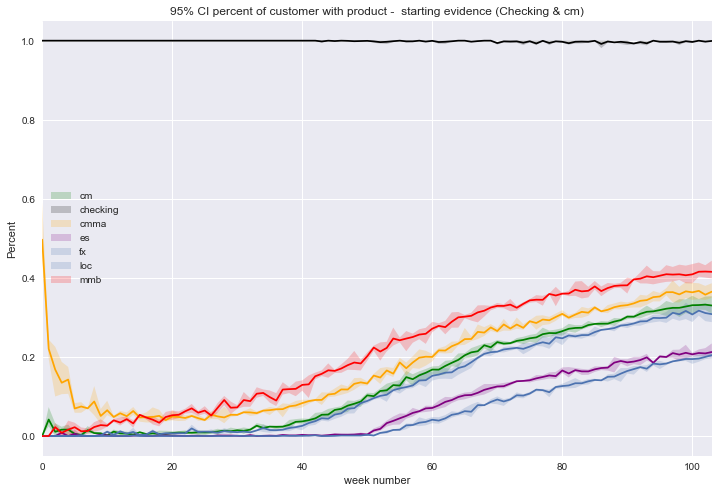

In [307]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,8))
#cm
sns.tsplot(data = cumulative_cm_customers_percent_evidence_checking_cm_final,value = 'cm',color='green', ci=95)
#checking
sns.tsplot(data =cumulative_checking_customers_percent_evidence_checking_cm_final, value = 'checking',color='black',ci=95)
#cmma
sns.tsplot(data =cumulative_cmma_customers_percent_evidence_checking_cm_final,value='cmma',color='orange',ci=95)
#es
sns.tsplot(data =cumulative_es_customers_percent_evidence_checking_cm_final,value='es',color='purple',ci=95)
#fx
sns.tsplot(data =cumulative_fx_customers_percent_evidence_checking_cm_final,value='fx',ci=95)
#loc
sns.tsplot(data =cumulative_loc_customers_percent_evidence_checking_cm_final,value='loc',ci=95)
#mmb
sns.tsplot(data =cumulative_mmb_customers_percent_evidence_checking_cm_final,value='mmb',ci=95, color ='red')

checking.legend(['checking'])
plt.legend(['cm','checking','cmma','es','fx','loc','mmb'])
plt.ylabel('Percent')
plt.xlabel('week number')
plt.title('95% CI percent of customer with product -  starting evidence (Checking & cm)')

## Revenue per product time adjusted

In [312]:
cumulative_cm_rev_per_customer_evidence_checking_cm_final = []
cumulative_checking_rev_per_customer_evidence_checking_cm_final = []
cumulative_cmma_rev_per_customer_evidence_checking_cm_final = []
cumulative_es_rev_per_customer_evidence_checking_cm_final = []
cumulative_fx_rev_per_customer_evidence_checking_cm_final = []
cumulative_loc_rev_per_customer_evidence_checking_cm_final = []
cumulative_mmb_rev_per_customer_evidence_checking_cm_final = []

In [313]:
for simulation in rev_customer_cm_evidence_checking_cm:
    cumulative_cm_rev_per_customer_evidence_checking_cm_final.append([i[2] for i in simulation])
for simulation in rev_customer_checking_evidence_checking_cm:
    cumulative_checking_rev_per_customer_evidence_checking_cm_final.append([i[2] for i in simulation])
for simulation in rev_customer_cmma_evidence_checking_cm:
    cumulative_cmma_rev_per_customer_evidence_checking_cm_final.append([i[2] for i in simulation])
for simulation in rev_customer_es_evidence_checking_cm:
    cumulative_es_rev_per_customer_evidence_checking_cm_final.append([i[2] for i in simulation])
for simulation in rev_customer_fx_evidence_checking_cm:
    cumulative_fx_rev_per_customer_evidence_checking_cm_final.append([i[2] for i in simulation])
for simulation in rev_customer_loc_evidence_checking_cm:
    cumulative_loc_rev_per_customer_evidence_checking_cm_final.append([i[2] for i in simulation])
for simulation in rev_customer_mmb_evidence_checking_cm:
    cumulative_mmb_rev_per_customer_evidence_checking_cm_final.append([i[2] for i in simulation])

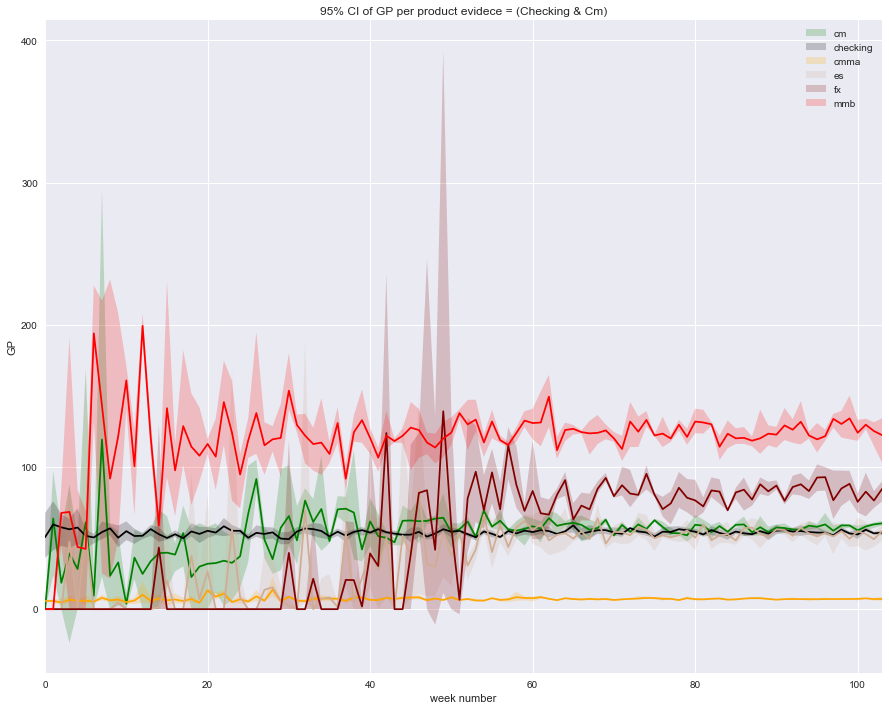

In [317]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,12))
#cm
sns.tsplot(data = cumulative_cm_rev_per_customer_evidence_checking_cm_final,value = 'cm',color='green', ci=95)
#checking
sns.tsplot(data =cumulative_checking_rev_per_customer_evidence_checking_cm_final, value = 'checking',color='black',ci=95)
#cmma
sns.tsplot(data =cumulative_cmma_rev_per_customer_evidence_checking_cm_final,value='cmma',color='orange',ci=95)
#es
sns.tsplot(data =cumulative_es_rev_per_customer_evidence_checking_cm_final,value='es',color='pink',ci=95)
#fx
sns.tsplot(data =cumulative_fx_rev_per_customer_evidence_checking_cm_final,value='fx',ci=95,color='maroon')
#loc
#sns.tsplot(data =cumulative_loc_rev_per_customer_evidence_checking_cm_final,value='loc',ci=95)
#mmb
sns.tsplot(data =cumulative_mmb_rev_per_customer_evidence_checking_cm_final,value='mmb',ci=95, color ='red')


plt.legend(['cm','checking','cmma','es','fx','mmb'])
plt.ylabel('GP')
plt.xlabel('week number')
plt.title('95% CI of GP per product evidece = (Checking & Cm)')

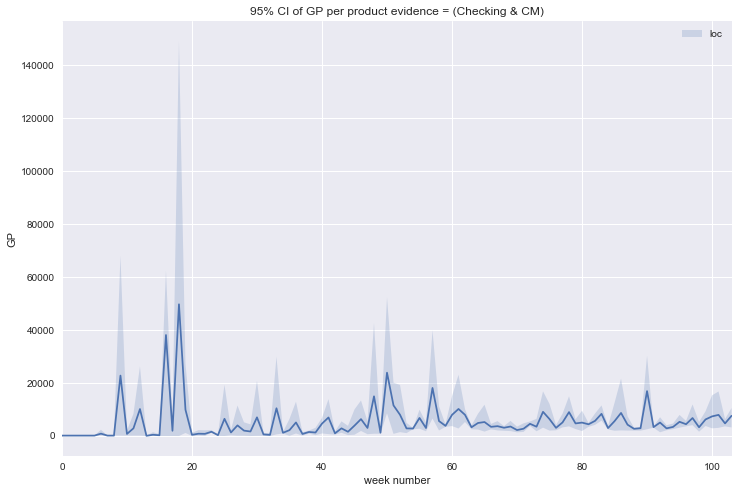

In [320]:
plt.figure(figsize=(12,8))
sns.tsplot(data =cumulative_loc_rev_per_customer_evidence_checking_cm_final,value='loc',ci=95)


plt.legend(['loc'])
plt.ylabel('GP')
plt.xlabel('week number')
plt.title('95% CI of GP per product evidence = (Checking & CM)')

In [333]:
print('Mean CM GP for last period (evid = checking , cm) = {}'.format(mean([cumulative_cm_rev_per_customer_evidence_checking_cm_final[0][-1],
        cumulative_cm_rev_per_customer_evidence_checking_cm_final[1][-1],
        cumulative_cm_rev_per_customer_evidence_checking_cm_final[2][-1]])))

Mean CM GP for last period (evid = checking , cm) = 60.361483800467376


In [334]:
print('Mean Checking GP for last period (evid = checking , cm) = {}'.format(mean([cumulative_checking_rev_per_customer_evidence_checking_cm_final[0][-1],
        cumulative_checking_rev_per_customer_evidence_checking_cm_final[1][-1],
        cumulative_checking_rev_per_customer_evidence_checking_cm_final[2][-1]])))

Mean Checking GP for last period (evid = checking , cm) = 53.8949778865875


In [335]:
print('Mean cmma GP for last period (evid = checking , cm) = {}'.format(mean([cumulative_cmma_rev_per_customer_evidence_checking_cm_final[0][-1],
        cumulative_cmma_rev_per_customer_evidence_checking_cm_final[1][-1],
        cumulative_cmma_rev_per_customer_evidence_checking_cm_final[2][-1]])))

Mean cmma GP for last period (evid = checking , cm) = 7.170256210942615


In [336]:
print('Mean es GP for last period (evid = checking , cm) = {}'.format(mean([cumulative_es_rev_per_customer_evidence_checking_cm_final[0][-1],
        cumulative_es_rev_per_customer_evidence_checking_cm_final[1][-1],
        cumulative_es_rev_per_customer_evidence_checking_cm_final[2][-1]])))

Mean es GP for last period (evid = checking , cm) = 55.01626726415463


In [337]:
print('Mean fx GP for last period (evid = checking , cm) = {}'.format(mean([cumulative_fx_rev_per_customer_evidence_checking_cm_final[0][-1],
        cumulative_fx_rev_per_customer_evidence_checking_cm_final[1][-1],
        cumulative_fx_rev_per_customer_evidence_checking_cm_final[2][-1]])))

Mean fx GP for last period (evid = checking , cm) = 84.56950049172676


In [338]:
print('Mean loc GP for last period (evid = checking , cm) = {}'.format(mean([cumulative_loc_rev_per_customer_evidence_checking_cm_final[0][-1],
        cumulative_loc_rev_per_customer_evidence_checking_cm_final[1][-1],
        cumulative_loc_rev_per_customer_evidence_checking_cm_final[2][-1]])))

Mean loc GP for last period (evid = checking , cm) = 7476.610331652569


# Next, starting evidence of checking & mmb

In [339]:
clients_over_time_per_week_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_all_clients")
cumulative_clients_over_time_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/times_series_cumulative_clients")
#cash management
cumulative_cm_customers_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_cash_management")
rev_customer_cm_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_cash_management_rev_per_customer")
total_weekly_rev_cm_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_cash_management_total_weekly_rev")
# checking
cumulative_checking_customers_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_checking")
rev_customer_checking_evidence_checking_mmb  = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_checking_rev_per_customer")
total_weekly_rev_checking_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_checking_total_weekly_rev")
#CMMA
cumulative_cmma_customers_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_collateral_mma ")
rev_customer_cmma_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_collateral_mma_rev_per_customer")
total_weekly_rev_cmma_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_collateral_mma_total_weekly_rev")
# Enterprise Sweep
cumulative_es_customers_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_enterprise_sweep")
rev_customer_es_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_enterprise_sweep_rev_per_customer")
total_weekly_rev_es_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_enterprise_sweep_total_weekly_rev")
# FX
cumulative_fx_customers_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_fx")
rev_customer_fx_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_fx_rev_per_customer")
total_weekly_rev_fx_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_fx_total_weekly_rev")
# letters of credit
cumulative_loc_customers_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_letters_of_credit ")
rev_customer_loc_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_letters_of_credit_rev_per_customer")
total_weekly_rev_loc_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_letters_of_credit_total_weekly_rev")
#Money Market Bonus
cumulative_mmb_customers_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_money_market_bonus")
rev_customer_mmb_evidence_checking_mmb = pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_money_market_bonus_rev_per_customer")
total_weekly_rev_mmb_evidence_checking_mmb =  pd.read_pickle("../data-104-weeks-checking-mmb/time_series_esp_money_market_bonus_total_weekly_rev")



In [340]:
 # get cumulative customers
cumulative_clients_week_0_evidence_checking_mmb = defaultdict(list)
cumulative_clients_week_1_evidence_checking_mmb = defaultdict(list)
cumulative_clients_week_2_evidence_checking_mmb = defaultdict(list)
cumulative_clients_week_0_final_evid_checking_mmb = []
cumulative_clients_week_1_final_evid_checking_mmb = []
cumulative_clients_week_2_final_evid_checking_mmb = []
[cumulative_clients_week_0_evidence_checking_mmb[i[1]].append(i[2]) for i in cumulative_clients_over_time_evidence_checking_mmb[0]]
[cumulative_clients_week_1_evidence_checking_mmb[i[1]].append(i[2]) for i in cumulative_clients_over_time_evidence_checking_mmb[1]]
[cumulative_clients_week_2_evidence_checking_mmb[i[1]].append(i[2]) for i in cumulative_clients_over_time_evidence_checking_mmb[2]]
for k,v in cumulative_clients_week_0_evidence_checking_mmb.items():
    cumulative_clients_week_0_final_evid_checking_mmb.append(max(v))
for k,v in cumulative_clients_week_1_evidence_checking_mmb.items():
    cumulative_clients_week_1_final_evid_checking_mmb.append(max(v))  
for k,v in cumulative_clients_week_2_evidence_checking_mmb.items():
    cumulative_clients_week_2_final_evid_checking_mmb.append(max(v)) 
final_cumulative_clients_evidence_checking_mmb = [cumulative_clients_week_0_final_evid_checking_mmb
                                        ,cumulative_clients_week_1_final_evid_checking_mmb,
                                        cumulative_clients_week_2_final_evid_checking_mmb]

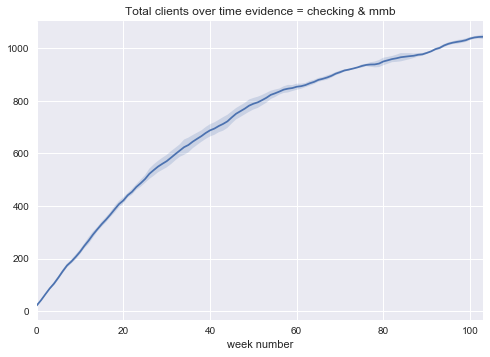

In [341]:
sns.tsplot(final_cumulative_clients_evidence_checking_mmb)
plt.title('Total clients over time evidence = checking & mmb')
plt.xlabel('week number')

## Percent of people with each product given evidence  = checking & mmb

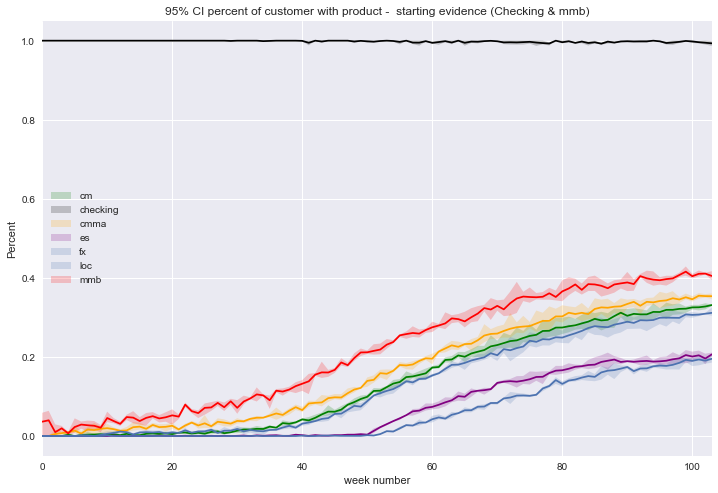

In [342]:
# Get the percent across the three simulations to create a 85% confidence interval
cumulative_cm_customers_percent_evidence_checking_mmb_final = []
cumulative_checking_customers_percent_evidence_checking_mmb_final = []
cumulative_cmma_customers_percent_evidence_checking_mmb_final = []
cumulative_es_customers_percent_evidence_checking_mmb_final = []
cumulative_fx_customers_percent_evidence_checking_mmb_final = []
cumulative_loc_customers_percent_evidence_checking_mmb_final = []
cumulative_mmb_customers_percent_evidence_checking_mmb_final = []


for simulation_fx,simulation_total in zip(cumulative_fx_customers_evidence_checking_mmb,
                                                final_cumulative_clients_evidence_checking_mmb) :
    cumulative_fx_customers_percent_evidence_checking_mmb_final.append(
        [i[2]/z for i,z in zip(simulation_fx,simulation_total)])
for simulation_cm,simulation_total in zip(cumulative_cm_customers_evidence_checking_mmb,
                                                final_cumulative_clients_evidence_checking_mmb) :
    cumulative_cm_customers_percent_evidence_checking_mmb_final.append(
        [i[2]/z for i,z in zip(simulation_cm,simulation_total)])
for simulation_loc,simulation_total in zip(cumulative_loc_customers_evidence_checking_mmb,
                                                final_cumulative_clients_evidence_checking_mmb) :
    cumulative_loc_customers_percent_evidence_checking_mmb_final.append(
        [i[2]/z for i,z in zip(simulation_loc,simulation_total)])
for simulation_checking,simulation_total in zip(cumulative_checking_customers_evidence_checking_mmb,
                                                final_cumulative_clients_evidence_checking_mmb) :
    cumulative_checking_customers_percent_evidence_checking_mmb_final.append(
        [i[2]/z for i,z in zip(simulation_checking,simulation_total)])
for simulation_cmma,simulation_total in zip(cumulative_cmma_customers_evidence_checking_mmb,
                                                final_cumulative_clients_evidence_checking_mmb) :
    cumulative_cmma_customers_percent_evidence_checking_mmb_final.append(
        [i[2]/z for i,z in zip(simulation_cmma,simulation_total)])
for simulation_es,simulation_total in zip(cumulative_es_customers_evidence_checking_mmb,
                                                final_cumulative_clients_evidence_checking_mmb) :
    cumulative_es_customers_percent_evidence_checking_mmb_final.append(
        [i[2]/z for i,z in zip(simulation_es,simulation_total)])
for simulation_mmb,simulation_total in zip(cumulative_mmb_customers_evidence_checking_mmb,
                                                final_cumulative_clients_evidence_checking_mmb) :
    cumulative_mmb_customers_percent_evidence_checking_mmb_final.append(
        [i[2]/z for i,z in zip(simulation_mmb,simulation_total)])
    
#plot
sns.set(style="darkgrid")
plt.figure(figsize=(12,8))
#cm
sns.tsplot(data = cumulative_cm_customers_percent_evidence_checking_mmb_final,value = 'cm',color='green', ci=95)
#checking
sns.tsplot(data =cumulative_checking_customers_percent_evidence_checking_mmb_final, value = 'checking',color='black',ci=95)
#cmma
sns.tsplot(data =cumulative_cmma_customers_percent_evidence_checking_mmb_final,value='cmma',color='orange',ci=95)
#es
sns.tsplot(data =cumulative_es_customers_percent_evidence_checking_mmb_final,value='es',color='purple',ci=95)
#fx
sns.tsplot(data =cumulative_fx_customers_percent_evidence_checking_mmb_final,value='fx',ci=95)
#loc
sns.tsplot(data =cumulative_loc_customers_percent_evidence_checking_mmb_final,value='loc',ci=95)
#mmb
sns.tsplot(data =cumulative_mmb_customers_percent_evidence_checking_mmb_final,value='mmb',ci=95, color ='red')

checking.legend(['checking'])
plt.legend(['cm','checking','cmma','es','fx','loc','mmb'])
plt.ylabel('Percent')
plt.xlabel('week number')
plt.title('95% CI percent of customer with product -  starting evidence (Checking & mmb)')

## Product revenue for evidence = checking & mmb

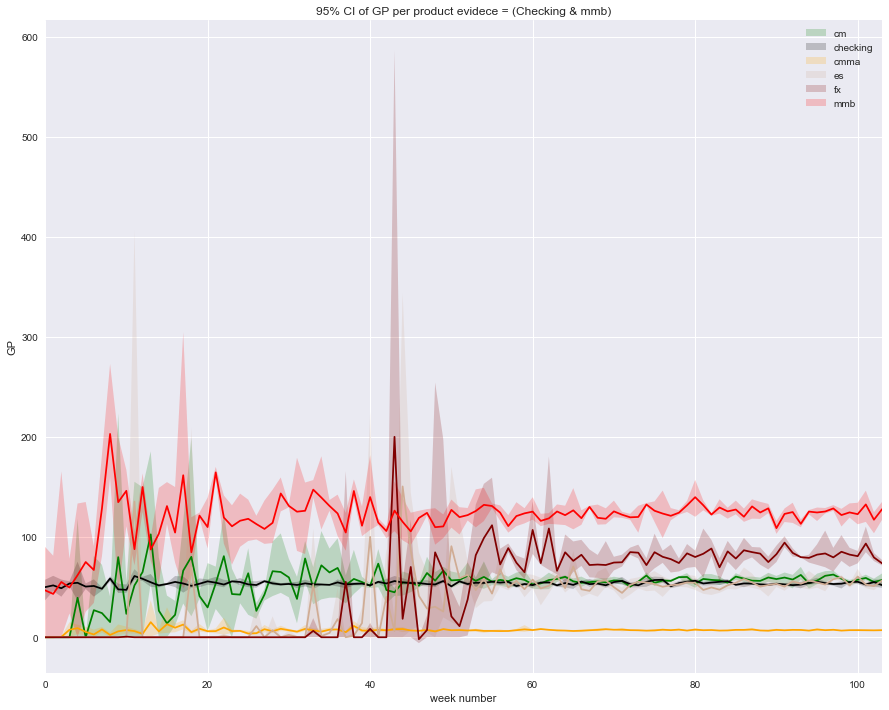

In [343]:
cumulative_cm_rev_per_customer_evidence_checking_mmb_final = []
cumulative_checking_rev_per_customer_evidence_checking_mmb_final = []
cumulative_cmma_rev_per_customer_evidence_checking_mmb_final = []
cumulative_es_rev_per_customer_evidence_checking_mmb_final = []
cumulative_fx_rev_per_customer_evidence_checking_mmb_final = []
cumulative_loc_rev_per_customer_evidence_checking_mmb_final = []
cumulative_mmb_rev_per_customer_evidence_checking_mmb_final = []



for simulation in rev_customer_cm_evidence_checking_mmb:
    cumulative_cm_rev_per_customer_evidence_checking_mmb_final.append([i[2] for i in simulation])
for simulation in rev_customer_checking_evidence_checking_mmb:
    cumulative_checking_rev_per_customer_evidence_checking_mmb_final.append([i[2] for i in simulation])
for simulation in rev_customer_cmma_evidence_checking_mmb:
    cumulative_cmma_rev_per_customer_evidence_checking_mmb_final.append([i[2] for i in simulation])
for simulation in rev_customer_es_evidence_checking_mmb:
    cumulative_es_rev_per_customer_evidence_checking_mmb_final.append([i[2] for i in simulation])
for simulation in rev_customer_fx_evidence_checking_mmb:
    cumulative_fx_rev_per_customer_evidence_checking_mmb_final.append([i[2] for i in simulation])
for simulation in rev_customer_loc_evidence_checking_mmb:
    cumulative_loc_rev_per_customer_evidence_checking_mmb_final.append([i[2] for i in simulation])
for simulation in rev_customer_mmb_evidence_checking_mmb:
    cumulative_mmb_rev_per_customer_evidence_checking_mmb_final.append([i[2] for i in simulation])
    
    
#plot
plt.figure(figsize=(15,12))
#cm
sns.tsplot(data = cumulative_cm_rev_per_customer_evidence_checking_mmb_final,value = 'cm',color='green', ci=95)
#checking
sns.tsplot(data =cumulative_checking_rev_per_customer_evidence_checking_mmb_final, value = 'checking',color='black',ci=95)
#cmma
sns.tsplot(data =cumulative_cmma_rev_per_customer_evidence_checking_mmb_final,value='cmma',color='orange',ci=95)
#es
sns.tsplot(data =cumulative_es_rev_per_customer_evidence_checking_mmb_final,value='es',color='pink',ci=95)
#fx
sns.tsplot(data =cumulative_fx_rev_per_customer_evidence_checking_mmb_final,value='fx',ci=95,color='maroon')
#loc
#sns.tsplot(data =cumulative_loc_rev_per_customer_evidence_checking_mmb_final,value='loc',ci=95)
#mmb
sns.tsplot(data =cumulative_mmb_rev_per_customer_evidence_checking_mmb_final,value='mmb',ci=95, color ='red')


plt.legend(['cm','checking','cmma','es','fx','mmb'])
plt.ylabel('GP')
plt.xlabel('week number')
plt.title('95% CI of GP per product evidece = (Checking & mmb)')

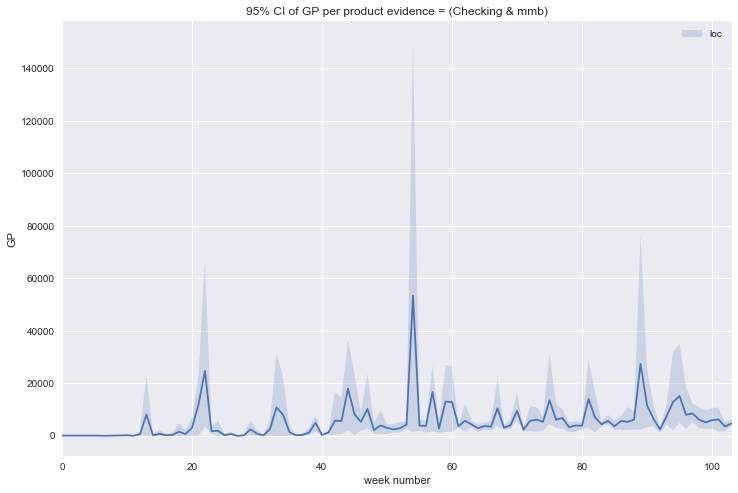

In [344]:
plt.figure(figsize=(12,8))
sns.tsplot(data =cumulative_loc_rev_per_customer_evidence_checking_mmb_final,value='loc',ci=95)


plt.legend(['loc'])
plt.ylabel('GP')
plt.xlabel('week number')
plt.title('95% CI of GP per product evidence = (Checking & mmb)')

# Finally, starting evidence checking & loc

In [345]:
clients_over_time_per_week_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_all_clients")
cumulative_clients_over_time_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-mmb/times_series_cumulative_clients")
#cash management
cumulative_cm_customers_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_cash_management")
rev_customer_cm_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_cash_management_rev_per_customer")
total_weekly_rev_cm_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_cash_management_total_weekly_rev")
# checking
cumulative_checking_customers_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_checking")
rev_customer_checking_evidence_checking_loc  = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_checking_rev_per_customer")
total_weekly_rev_checking_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_checking_total_weekly_rev")
#CMMA
cumulative_cmma_customers_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_collateral_mma ")
rev_customer_cmma_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_collateral_mma_rev_per_customer")
total_weekly_rev_cmma_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_collateral_mma_total_weekly_rev")
# Enterprise Sweep
cumulative_es_customers_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_enterprise_sweep")
rev_customer_es_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_enterprise_sweep_rev_per_customer")
total_weekly_rev_es_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_enterprise_sweep_total_weekly_rev")
# FX
cumulative_fx_customers_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_fx")
rev_customer_fx_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_fx_rev_per_customer")
total_weekly_rev_fx_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_fx_total_weekly_rev")
# letters of credit
cumulative_loc_customers_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_letters_of_credit ")
rev_customer_loc_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_letters_of_credit_rev_per_customer")
total_weekly_rev_loc_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_letters_of_credit_total_weekly_rev")
#Money Market Bonus
cumulative_mmb_customers_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_money_market_bonus")
rev_customer_mmb_evidence_checking_loc = pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_money_market_bonus_rev_per_customer")
total_weekly_rev_mmb_evidence_checking_loc =  pd.read_pickle("../data-104-weeks-checking-loc/time_series_esp_money_market_bonus_total_weekly_rev")



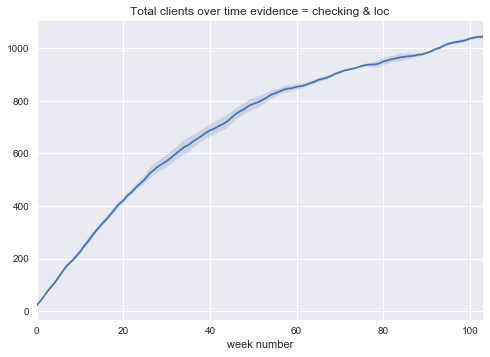

In [346]:
 # get cumulative customers
cumulative_clients_week_0_evidence_checking_loc = defaultdict(list)
cumulative_clients_week_1_evidence_checking_loc = defaultdict(list)
cumulative_clients_week_2_evidence_checking_loc = defaultdict(list)
cumulative_clients_week_0_final_evid_checking_loc = []
cumulative_clients_week_1_final_evid_checking_loc = []
cumulative_clients_week_2_final_evid_checking_loc = []
[cumulative_clients_week_0_evidence_checking_loc[i[1]].append(i[2]) for i in cumulative_clients_over_time_evidence_checking_loc[0]]
[cumulative_clients_week_1_evidence_checking_loc[i[1]].append(i[2]) for i in cumulative_clients_over_time_evidence_checking_loc[1]]
[cumulative_clients_week_2_evidence_checking_loc[i[1]].append(i[2]) for i in cumulative_clients_over_time_evidence_checking_loc[2]]
for k,v in cumulative_clients_week_0_evidence_checking_loc.items():
    cumulative_clients_week_0_final_evid_checking_loc.append(max(v))
for k,v in cumulative_clients_week_1_evidence_checking_loc.items():
    cumulative_clients_week_1_final_evid_checking_loc.append(max(v))  
for k,v in cumulative_clients_week_2_evidence_checking_loc.items():
    cumulative_clients_week_2_final_evid_checking_loc.append(max(v)) 
final_cumulative_clients_evidence_checking_loc = [cumulative_clients_week_0_final_evid_checking_loc
                                        ,cumulative_clients_week_1_final_evid_checking_loc,
                                        cumulative_clients_week_2_final_evid_checking_loc]

#plot it
sns.tsplot(final_cumulative_clients_evidence_checking_loc)
plt.title('Total clients over time evidence = checking & loc')
plt.xlabel('week number')

# Number of clients with each product given evidence = checking and loc

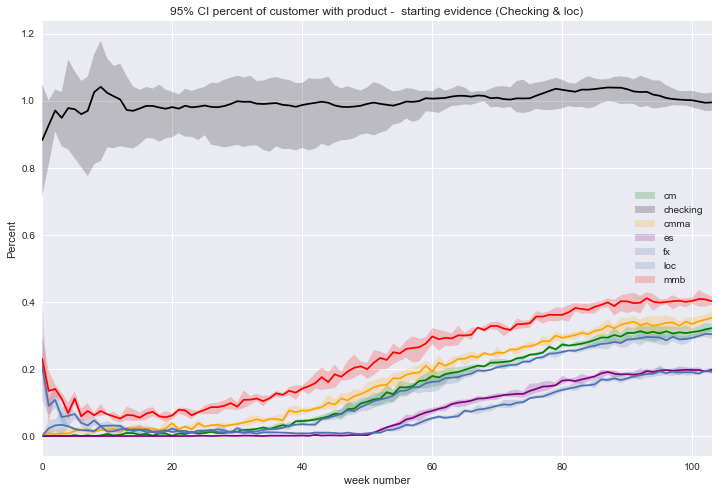

In [347]:
# Get the percent across the three simulations to create a 85% confidence interval
cumulative_cm_customers_percent_evidence_checking_loc_final = []
cumulative_checking_customers_percent_evidence_checking_loc_final = []
cumulative_cmma_customers_percent_evidence_checking_loc_final = []
cumulative_es_customers_percent_evidence_checking_loc_final = []
cumulative_fx_customers_percent_evidence_checking_loc_final = []
cumulative_loc_customers_percent_evidence_checking_loc_final = []
cumulative_mmb_customers_percent_evidence_checking_loc_final = []


for simulation_fx,simulation_total in zip(cumulative_fx_customers_evidence_checking_loc,
                                                final_cumulative_clients_evidence_checking_loc) :
    cumulative_fx_customers_percent_evidence_checking_loc_final.append(
        [i[2]/z for i,z in zip(simulation_fx,simulation_total)])
    
for simulation_cm,simulation_total in zip(cumulative_cm_customers_evidence_checking_loc,
                                                final_cumulative_clients_evidence_checking_loc) :
    cumulative_cm_customers_percent_evidence_checking_loc_final.append(
        [i[2]/z for i,z in zip(simulation_cm,simulation_total)])
    
for simulation_loc,simulation_total in zip(cumulative_loc_customers_evidence_checking_loc,
                                                final_cumulative_clients_evidence_checking_loc) :
    cumulative_loc_customers_percent_evidence_checking_loc_final.append(
        [i[2]/z for i,z in zip(simulation_loc,simulation_total)])
    
for simulation_checking,simulation_total in zip(cumulative_checking_customers_evidence_checking_loc,
                                                final_cumulative_clients_evidence_checking_loc) :
    cumulative_checking_customers_percent_evidence_checking_loc_final.append(
        [i[2]/z for i,z in zip(simulation_checking,simulation_total)])
    
for simulation_cmma,simulation_total in zip(cumulative_cmma_customers_evidence_checking_loc,
                                                final_cumulative_clients_evidence_checking_loc) :
    cumulative_cmma_customers_percent_evidence_checking_loc_final.append(
        [i[2]/z for i,z in zip(simulation_cmma,simulation_total)])
    
for simulation_es,simulation_total in zip(cumulative_es_customers_evidence_checking_loc,
                                                final_cumulative_clients_evidence_checking_loc) :
    cumulative_es_customers_percent_evidence_checking_loc_final.append(
        [i[2]/z for i,z in zip(simulation_es,simulation_total)])
    
for simulation_mmb,simulation_total in zip(cumulative_mmb_customers_evidence_checking_loc,
                                                final_cumulative_clients_evidence_checking_loc) :
    cumulative_mmb_customers_percent_evidence_checking_loc_final.append(
        [i[2]/z for i,z in zip(simulation_mmb,simulation_total)])
    
#plot
sns.set(style="darkgrid")
plt.figure(figsize=(12,8))
#cm
sns.tsplot(data = cumulative_cm_customers_percent_evidence_checking_loc_final,value = 'cm',color='green', ci=95)
#checking
sns.tsplot(data =cumulative_checking_customers_percent_evidence_checking_loc_final, value = 'checking',color='black',ci=95)
#cmma
sns.tsplot(data =cumulative_cmma_customers_percent_evidence_checking_loc_final,value='cmma',color='orange',ci=95)
#es
sns.tsplot(data =cumulative_es_customers_percent_evidence_checking_loc_final,value='es',color='purple',ci=95)
#fx
sns.tsplot(data =cumulative_fx_customers_percent_evidence_checking_loc_final,value='fx',ci=95)
#loc
sns.tsplot(data =cumulative_loc_customers_percent_evidence_checking_loc_final,value='loc',ci=95)
#mmb
sns.tsplot(data =cumulative_mmb_customers_percent_evidence_checking_loc_final,value='mmb',ci=95, color ='red')

checking.legend(['checking'])
plt.legend(['cm','checking','cmma','es','fx','loc','mmb'])
plt.ylabel('Percent')
plt.xlabel('week number')
plt.title('95% CI percent of customer with product -  starting evidence (Checking & loc)')

# GP per product per customer given evidence = checking loc

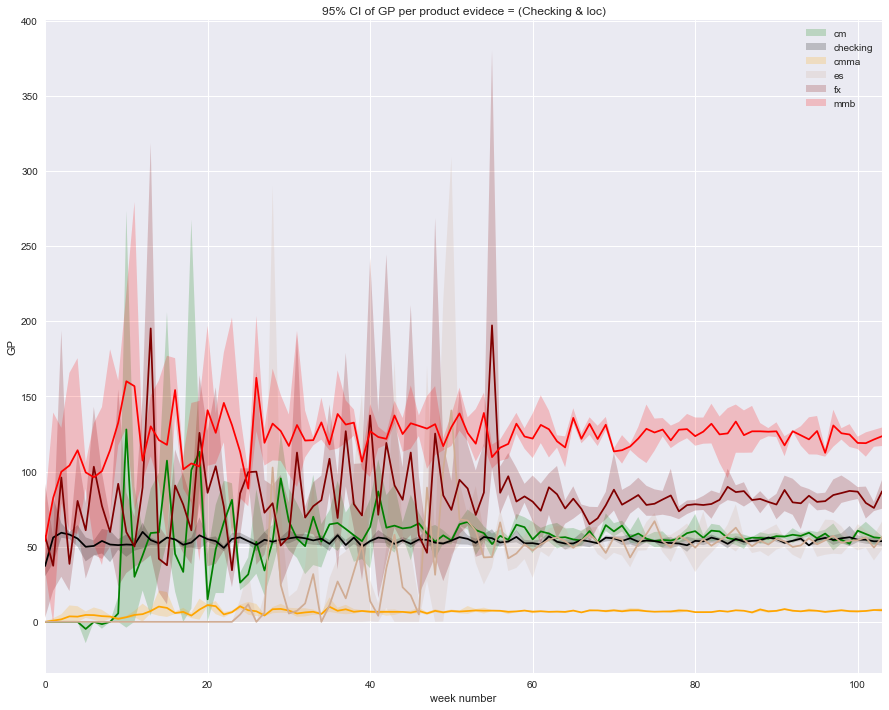

In [351]:
cumulative_cm_rev_per_customer_evidence_checking_loc_final = []
cumulative_checking_rev_per_customer_evidence_checking_loc_final = []
cumulative_cmma_rev_per_customer_evidence_checking_loc_final = []
cumulative_es_rev_per_customer_evidence_checking_loc_final = []
cumulative_fx_rev_per_customer_evidence_checking_loc_final = []
cumulative_loc_rev_per_customer_evidence_checking_loc_final = []
cumulative_mmb_rev_per_customer_evidence_checking_loc_final = []



for simulation in rev_customer_cm_evidence_checking_loc:
    cumulative_cm_rev_per_customer_evidence_checking_loc_final.append([i[2] for i in simulation])
for simulation in rev_customer_checking_evidence_checking_loc:
    cumulative_checking_rev_per_customer_evidence_checking_loc_final.append([i[2] for i in simulation])
for simulation in rev_customer_cmma_evidence_checking_loc:
    cumulative_cmma_rev_per_customer_evidence_checking_loc_final.append([i[2] for i in simulation])
for simulation in rev_customer_es_evidence_checking_loc:
    cumulative_es_rev_per_customer_evidence_checking_loc_final.append([i[2] for i in simulation])
for simulation in rev_customer_fx_evidence_checking_loc:
    cumulative_fx_rev_per_customer_evidence_checking_loc_final.append([i[2] for i in simulation])
for simulation in rev_customer_loc_evidence_checking_loc:
    cumulative_loc_rev_per_customer_evidence_checking_loc_final.append([i[2] for i in simulation])
for simulation in rev_customer_mmb_evidence_checking_loc:
    cumulative_mmb_rev_per_customer_evidence_checking_loc_final.append([i[2] for i in simulation])
    
    
#plot
plt.figure(figsize=(15,12))
#cm
sns.tsplot(data = cumulative_cm_rev_per_customer_evidence_checking_loc_final,value = 'cm',color='green', ci=95)
#checking
sns.tsplot(data =cumulative_checking_rev_per_customer_evidence_checking_loc_final, value = 'checking',color='black',ci=95)
#cmma
sns.tsplot(data =cumulative_cmma_rev_per_customer_evidence_checking_loc_final,value='cmma',color='orange',ci=95)
#es
sns.tsplot(data =cumulative_es_rev_per_customer_evidence_checking_loc_final,value='es',color='pink',ci=95)
#fx
sns.tsplot(data =cumulative_fx_rev_per_customer_evidence_checking_loc_final,value='fx',ci=95,color='maroon')
#loc
#sns.tsplot(data =cumulative_loc_rev_per_customer_evidence_checking_loc_final,value='loc',ci=95)
#mmb
sns.tsplot(data =cumulative_mmb_rev_per_customer_evidence_checking_loc_final,value='mmb',ci=95, color ='red')


plt.legend(['cm','checking','cmma','es','fx','mmb'])
plt.ylabel('GP')
plt.xlabel('week number')
plt.title('95% CI of GP per product evidece = (Checking & loc)')

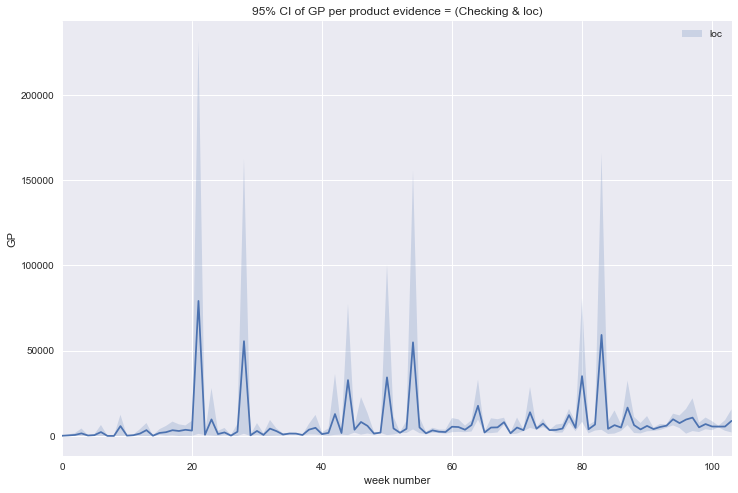

In [352]:
plt.figure(figsize=(12,8))
sns.tsplot(data =cumulative_loc_rev_per_customer_evidence_checking_loc_final,value='loc',ci=95)


plt.legend(['loc'])
plt.ylabel('GP')
plt.xlabel('week number')
plt.title('95% CI of GP per product evidence = (Checking & loc)')